In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('svm_dataset (1).csv')

In [ ]:
df.head()

,Feature1,Feature2,Class
0,-2.509198,-4.765886,0
1,9.014286,-5.060424,1
2,4.639879,8.125092,1
3,1.973170,-5.009076,0
4,-6.879627,-4.561005,0


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn. preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
y_test

,Class
1860,1
353,1
1333,1
905,0
1289,0
...,...
965,1
1284,0
1739,0
261,1


In [ ]:
predicated_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicated_df

,Actual,Predicted
1860,1,1
353,1,1
1333,1,1
905,0,0
1289,0,0
...,...,...
965,1,1
1284,0,0
1739,0,0
261,1,1


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
classification_report = classification_report(y_test, y_pred)
classification_report

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99       198\n           1       0.99      0.99      0.99       202\n\n    accuracy                           0.99       400\n   macro avg       0.99      0.99      0.99       400\nweighted avg       0.99      0.99      0.99       400\n'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

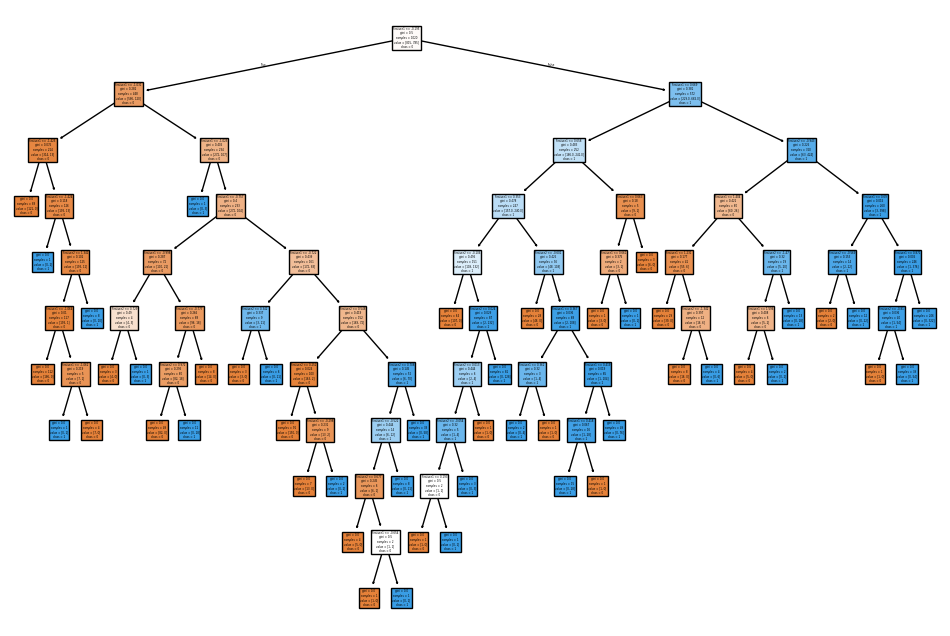

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'model' is your RandomForestClassifier
# Extract the first tree (estimator) from the forest
tree = model.estimators_[0]

plt.figure(figsize=(12, 8))

# Convert class names to strings
class_names = [str(name) for name in df['Class'].unique()]

# Replace with actual feature and target names
plot_tree(tree, feature_names=X.columns, class_names=class_names, filled=True)

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Use best parameters to train the model
best_clf = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
best_clf = grid_search.best_estimator_

In [ ]:
y_pred2 = best_clf.predict(X_test)

In [ ]:
accrucy = accuracy_score(y_test, y_pred2)
accrucy

0.9825